# Applying Deep Learning for Prediction of Shoreline Dynamics in Coastal Louisiana



Dhan Lord B. Fortela, PhD (Principal Investigator); Chemical Engineering, University of Louisiana at Lafayette; Email: dhanlord.fortela@louisiana.edu; Office phone: (+1)337-482-5765.

Kevin Toups (Funded Undergraduate Student); Chemical Engineering, University of Louisiana at Lafayette



---


This LaSSO research project is funded by the partnership grant of Louisiana Space Grant Consortium (LaSPACE) & Louisiana Sea Grant (LSG)

Primary Grant by U.S. Department of Commerce‐NOAA: NA18OAR4170098

Subaward: PO‐0000064084

Louisiana State University, Baton Rouge, Louisiana 70803, United States

---

## Introduction

The Convolutional LSTM architectures bring together time series processing and computer vision by introducing a convolutional recurrent cell in a LSTM layer. In this work, we implement ConvLSTM using TensorFlow libraries via Keras API to train on historical data on shoreline dynamics in select areas of coastal Lousiana (around the Marsh Island) to be able to make predictions of near-term dynamics. In Google Colab implementation of the code, use graphics processing unit (GPU) accelerator option to significantly imporve the computation speed with the ConvLSTM algo.


## Setup

If running this notebook in Google Colab, make sure to always refresh the runtime (click 'Runtime' > 'Disconnect and delete runtime') to re-initialize the git-clone of the GitHUb repo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox

import cv2

Let's updgrade the Colab RAM.
Run the code below to saturate and eventually exhaust the RAM (12GB) and Colab will ask if we need more RAM and we will choose higher RAM.

Oooopppsss. Well, apparently this trick does not work anymore. It used to work before Google changed the option (or removed the option) to run at higher RAM for free. Now we have to upgrade to get more RAM and GPU.

In [ ]:
# [1]*10**10

## Dataset Construction

The data to be ingested by the deep learning model must be a tensor. We will build that iinput tensor usign our raw datasets. The datasets for this project has been curated in the GitHub repo for the project: "https://github.com/dhanfort/NASA_NOAA_LaSSO21_dlbfortela.git".

We will access this repo to load the datasets. The following steps and codes show this step-by -step dataset loading and input tensor construction. Note that the GitHub repo folders containing the PNG files have been grouped based on the area of study (please chekc the GitHub repo to visually see the 25 areas of study around Marsh Island Louisiana.

Access the GitHub repo for the project: NASA_NOAA_LaSSO21_dlbfortela.git

In [ ]:
!git clone "https://github.com/dhanfort/NASA_NOAA_LaSSO21_dlbfortela.git"

Cloning into 'NASA_NOAA_LaSSO21_dlbfortela'...
remote: Enumerating objects: 557, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 557 (delta 13), reused 106 (delta 8), pack-reused 395
Receiving objects: 100% (557/557), 604.28 KiB | 21.58 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [ ]:
!ls

NASA_NOAA_LaSSO21_dlbfortela  sample_data


Create the path to the contents of the repo: '/content/reponame/subfolder/.../':

In [ ]:
files_path = '/content/NASA_NOAA_LaSSO21_dlbfortela/PNG'

Load each area dataset to define the data arrays to be used for the input data stream. 

Note that these loading codes can be shortened by writing a loop that access all the folders using a snippet of looping code. But we preferred that each area of study be loaded manually so we could selectively try various training data combinations.

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory

path = files_path+"/area1/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area1.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area1=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

Examine the structure of our dataset in this first load before proceeding to the other loads.

In [ ]:
print(dataset_area1.shape)

(46, 100, 109, 3)


In [ ]:
dataset_area1[1].shape

(100, 109, 3)

In [ ]:
image1 = dataset_area1[1][:,:,1]

In [ ]:
image1.shape

(100, 109)

Load the other data:

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area2/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area2.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area2=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
print(dataset_area2.shape)

(46, 100, 109, 3)


In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area3/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area3.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area3=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
print(dataset_area3.shape)

(46, 100, 109, 3)


In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area4/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area4.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area4=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
print(dataset_area4.shape)

(46, 100, 109, 3)


In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area5/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area5.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)

# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area5=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area6/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area6.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area6=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area7/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area7.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area7=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area8/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area8.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)

# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area8=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area9/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area9.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area9=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area10/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area10.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)

                #x_train.append(im)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area10=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

## Other Data

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area11/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area11.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area11=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area12/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area12.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area12=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area13/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area13.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area13=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area14/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area14.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area14=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area15/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area15.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area15=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area16/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area16.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area16=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area17/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area17.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area17=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area18/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area18.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area18=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area19/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area19.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area19=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area20/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area20.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area20=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area21/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area21.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area21=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area22/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area22.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area22=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area23/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area23.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area23=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area24/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area24.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area24=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

In [ ]:
from PIL import Image
import os, sys
import cv2


## Path to image directory
path = files_path+"/area25/"
dirs = os.listdir( path )
dirs.sort()
x_train=[]

## Load the tabular weather data
tab_data = pd.read_csv(path+'NOAA_NOWData_Daily_Precip_Temp_area25.csv')

## Determine key weathetr data stats
# temp
temp_min = tab_data.Temp_Ave_F.min()
temp_range = tab_data.Temp_Ave_F.max() - tab_data.Temp_Ave_F.min()

# rain
rain_min = tab_data.Precipitation_in.min()
rain_range = tab_data.Precipitation_in.max() - tab_data.Precipitation_in.min()


# Load the image data and iterate to add the tabular weather data
'''
- Assign the value of the weather var as another image layer/channel
of the same size as the image data

- Assign the weather var value according to the year/date of the image filename
and the filename in the tabular data

- Normalize the weather var data to a grayscale range: 0-255, 0 for the lowesr var value

'''

def load_dataset():
    # Append images to a list
    for item in dirs:
        if os.path.isfile(path+item):
            if item.endswith(".png"):
                
                filename = item.split(".", 1)[0]
                
                im = Image.open(path+item).convert("L")
                #im = Image.open(path+item).convert("L")
                #im = cv2.imread(path+item, 0)
                im = np.array(im)
                
                im = im.reshape(100, 109, 1)
                
                # Temp
                temp = tab_data[tab_data["Rasters"]==filename]["Temp_Ave_F"]
                temp =  (temp-temp_min)/temp_range*255
                temp = np.full((100, 109, 1), temp) # this is now an array/raster
                
                # Rain
                rain = tab_data[tab_data["Rasters"]==filename]["Precipitation_in"]
                rain =  (rain-rain_min)/rain_range*255
                rain = np.full((100, 109, 1), rain) # this is now an array/raster
                
                
                #weather_var1 = np.random.randint(0, high=255, size=(100, 109, 1))
                #weather_var2 = np.random.randint(0, high=255, size=(100, 109, 1))
                
                merge_image = np.concatenate((im,temp,rain), axis=2)
                
                x_train.append(merge_image)


# Call the function
if __name__ == "__main__":
    
    load_dataset()
    
    # Convert and save the list of images in '.npy' format
    dataset_area25=np.array(x_train)
    
    #np.save("LaSSO_MIslands_Sample_area5.npy",imgset)

## Define Working Input Data Array

In [ ]:
times = dataset_area1.shape[0]
print('Times: '+ str(times))

frames_width = dataset_area1.shape[1]
print('Frame width: '+ str(frames_width))

frames_height = dataset_area1.shape[2]
print('Frame width: '+ str(frames_height))

channels = dataset_area1.shape[3]
print('channels: '+ str(channels))

Times: 46
Frame width: 100
Frame width: 109
channels: 3


In [ ]:
#dataset_area1 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area1.npy')
#dataset_area2 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area2.npy')
#dataset_area3 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area3.npy')
#dataset_area4 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area4.npy')
#dataset_area5 = np.load('/Users/dhan-lordfortela/Desktop/LaSSO_FinalWorks/Thesis_ConvLSTM-master/Moving_MNIST_create_code/LaSSO_MIslands_Sample_area5.npy')



dataset_area1 = dataset_area1.reshape((times, frames_width, frames_height, channels))
dataset_area2 = dataset_area2.reshape((times, frames_width, frames_height, channels))
dataset_area3 = dataset_area3.reshape((times, frames_width, frames_height, channels))
dataset_area4 = dataset_area4.reshape((times, frames_width, frames_height, channels))
dataset_area5 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area6 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area7 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area8 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area9 = dataset_area5.reshape((times, frames_width, frames_height, channels))
dataset_area10 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area11 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area12 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area13 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area14 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area15 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area16 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area17 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area18 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area19 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area20 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area21 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area22 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area23 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area24 = dataset_area5.reshape((times, frames_width, frames_height, channels))
#dataset_area25 = dataset_area5.reshape((times, frames_width, frames_height, channels))


moving = np.atleast_1d([dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10
                        #dataset_area11,dataset_area12,dataset_area13,dataset_area14,dataset_area15,
                        #dataset_area16,dataset_area17,dataset_area18,dataset_area19,dataset_area20,
                        #dataset_area21,dataset_area22,dataset_area23,dataset_area24,dataset_area25,
                        #dataset_area1,dataset_area2,dataset_area3,dataset_area4,dataset_area5,
                        #dataset_area6,dataset_area7,dataset_area8,dataset_area9,dataset_area10,
                        #dataset_area11,dataset_area12,dataset_area13,dataset_area14,dataset_area15,
                        #dataset_area16,dataset_area17,dataset_area18,dataset_area19,dataset_area20,
                        #dataset_area21,dataset_area22,dataset_area23,dataset_area24,dataset_area25
                        ])
print(moving.shape)

num_areas = moving.shape[0]

dt = moving.reshape(num_areas, times, frames_width, frames_height, channels)
print(dt.shape)


(220, 46, 100, 109, 3)
(220, 46, 100, 109, 3)


In [ ]:

dataset=dt
print(dataset.shape)

# Split into train and validation sets using indexing to optimize memory.
indexes = np.arange(dataset.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.8 * dataset.shape[0])]
val_index = indexes[int(0.8 * dataset.shape[0]) :]
train_dataset = dataset[train_index]
val_dataset = dataset[val_index]

# Normalize the data to the 0-1 range.
train_dataset = train_dataset / 255
val_dataset = val_dataset / 255

# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :]
    return x, y


# Apply the processing function to the datasets.
x_train, y_train = create_shifted_frames(train_dataset)
x_val, y_val = create_shifted_frames(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

(220, 46, 100, 109, 3)
Training Dataset Shapes: (176, 45, 100, 109, 3), (176, 45, 100, 109, 3)
Validation Dataset Shapes: (44, 45, 100, 109, 3), (44, 45, 100, 109, 3)


## Data Visualization

Our data consists of sequences of frames, each of which are used to predict the upcoming frame. Let's take a look at some of these sequential frames.

Displaying frames for example 147.


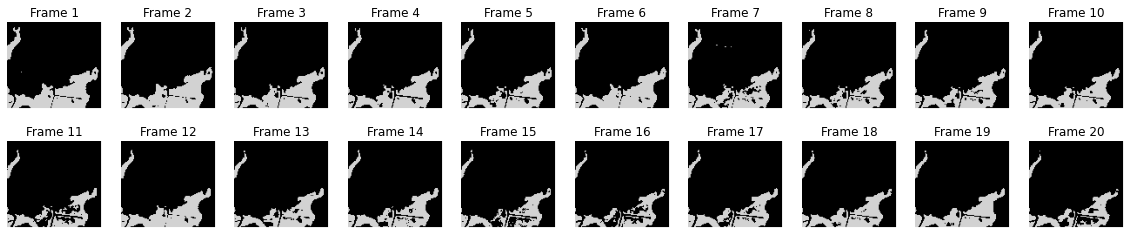

In [ ]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(2, 10, figsize=(20, 4))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(train_dataset)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(np.squeeze(train_dataset[data_choice][idx][:,:,0]), cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying frames for example {data_choice}.")
plt.show()

## Model Construction

To build a Convolutional LSTM model, we will use the ConvLSTM2D layer, which will accept inputs of shape (batch_size, num_frames, width, height, channels), and return a prediction movie of the same shape.

In [ ]:
x_train.shape[1:]

(45, 100, 109, 3)

In [ ]:
# Construct the input layer with no definite frame size.
inp = layers.Input(shape=(None, *x_train.shape[2:]))

# We will construct 3 `ConvLSTM2D` layers with batch normalization,
# followed by a `Conv3D` layer for the spatiotemporal outputs.
x = layers.ConvLSTM2D(
    filters=32,
    #data_format='channels_last',
    kernel_size=(5, 5),
    padding="same",
    return_sequences=True,
    activation="relu",
)(inp)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=32,
    data_format='channels_last',
    kernel_size=(3, 3),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.BatchNormalization()(x)
x = layers.ConvLSTM2D(
    filters=16,
    data_format='channels_last',
    kernel_size=(1, 1),
    padding="same",
    return_sequences=True,
    activation="relu",
)(x)
x = layers.Conv3D(
    filters=3, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"
)(x)

# Next, we will build the complete model and compile it.
model = keras.models.Model(inp, x)
model.compile(
    loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(),
)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, 100, 109,   0         
                             3)]                                 
                                                                 
 conv_lstm2d (ConvLSTM2D)    (None, None, 100, 109, 3  112128    
                             2)                                  
                                                                 
 batch_normalization (BatchN  (None, None, 100, 109, 3  128      
 ormalization)               2)                                  
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, None, 100, 109, 3  73856     
                             2)                                  
                                                                 
 batch_normalization_1 (Batc  (None, None, 100, 109, 3  128  

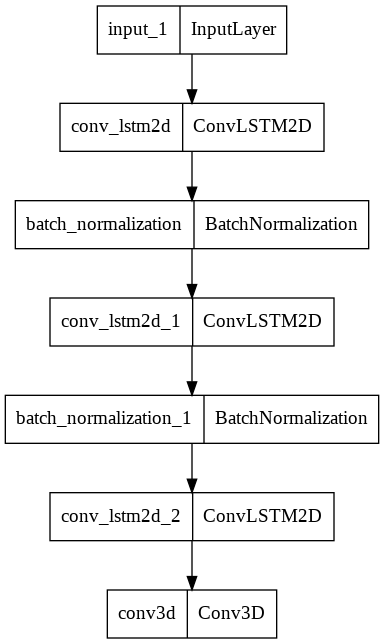

In [ ]:
import pydot
import graphviz

tf.keras.utils.plot_model(model)

## Model Training

With our model and data constructed, we can now train the model.

In [ ]:
# Define some callbacks to improve training.
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

# Define modifiable training hyperparameters.
epochs = 5 # orig. val=20
batch_size = 4

# Setup to store/log to a file the training metics (e.g., loss, accuracy, etc.)
# the comma separator prepares the file content as CSV format
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('training.log', separator=',', append=False)



# Fit the model to the training data.
model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr, csv_logger],
)

Epoch 1/5
44/44 [==============================] - 105s 2s/step - loss: 0.5904 - val_loss: 0.5116 - lr: 0.0010
Epoch 2/5
44/44 [==============================] - 84s 2s/step - loss: 0.4863 - val_loss: 0.5081 - lr: 0.0010
Epoch 3/5
44/44 [==============================] - 84s 2s/step - loss: 0.4543 - val_loss: 0.4989 - lr: 0.0010
Epoch 4/5
44/44 [==============================] - 84s 2s/step - loss: 0.4369 - val_loss: 0.5001 - lr: 0.0010
Epoch 5/5
44/44 [==============================] - 83s 2s/step - loss: 0.4921 - val_loss: 0.5189 - lr: 0.0010


## Save the trained model

In [ ]:
model.save('mymodel103')

INFO:tensorflow:Assets written to: mymodel103/assets


Zip the model folder so we can download the model files as single file from Colab.

In [ ]:
!zip -r /content/mymodel103.zip /content/mymodel103

  adding: content/mymodel103/ (stored 0%)
  adding: content/mymodel103/variables/ (stored 0%)
  adding: content/mymodel103/variables/variables.data-00000-of-00001 (deflated 5%)
  adding: content/mymodel103/variables/variables.index (deflated 69%)
  adding: content/mymodel103/assets/ (stored 0%)
  adding: content/mymodel103/keras_metadata.pb (deflated 93%)
  adding: content/mymodel103/saved_model.pb (deflated 91%)


Load the training metrics data and plot them for analysis:

In [ ]:
log_data = pd.read_csv('training.log', sep=',', engine='python')

In [ ]:
print(log_data)

   epoch      loss     lr  val_loss
0      0  0.590414  0.001  0.511561
1      1  0.486319  0.001  0.508080
2      2  0.454256  0.001  0.498884
3      3  0.436913  0.001  0.500111
4      4  0.492084  0.001  0.518858


## Frame Prediction Visualizations

With our model now constructed and trained, we can generate some example frame predictions based on a new video.

We'll pick a random example from the validation set and then choose the first 10 frames from them. From there, we can allow the model to predict 10 new frames, which we can compare to the ground truth frame predictions.

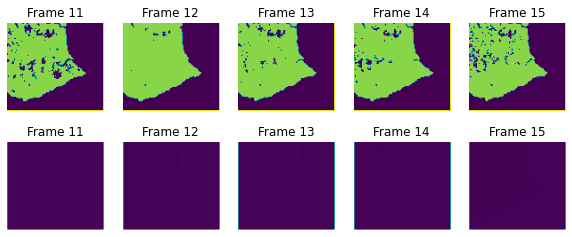

In [ ]:
# Select a random example from the validation dataset.
example = val_dataset[np.random.choice(range(len(val_dataset)), size=1)[0]]

# Pick the first/last ten frames from the example.
frames = example[:10, ...]
original_frames = example[10:, ...]

# Predict a new set of 10 frames.
for _ in range(10):
    # Extract the model's prediction and post-process it.
    new_prediction = model.predict(np.expand_dims(frames, axis=0))
    new_prediction = np.squeeze(new_prediction, axis=0)
    predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)

    # Extend the set of prediction frames.
    frames = np.concatenate((frames, predicted_frame), axis=0)

# Construct a figure for the original and new frames.
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(np.squeeze(original_frames[idx][:,:,0]), cmap="viridis")
    #ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Plot the new frames.
new_frames = frames[10:, ...]
for idx, ax in enumerate(axes[1]):
    ax.imshow(np.squeeze(new_frames[idx][:,:,0]), cmap="viridis")
    #ax.imshow(np.squeeze(original_frames[idx]), cmap="gray")
    ax.set_title(f"Frame {idx + 11}")
    ax.axis("off")

# Display the figure.
plt.show()

## Predicted Videos

Finally, we'll pick a few examples from the validation set and construct some GIFs with them to see the model's predicted videos.

You can use the trained model hosted on Hugging Face Hub (https://huggingface.co/keras-io/conv-lstm) and try the demo on Hugging Face Spaces (https://huggingface.co/spaces/keras-io/conv-lstm).

In [ ]:
examples = val_dataset[np.random.choice(range(len(val_dataset)), size=5)]
examples.shape
examples[1][1][:,:,0].shape

(100, 109)

In [ ]:
# Select a few random examples from the dataset.
examples = val_dataset[np.random.choice(range(len(val_dataset)), size=5)]


# Iterate over the examples and predict the frames.
predicted_videos = []
for example in examples:
    # Pick the first/last ten frames from the example.
    frames = example[:10, ...]
    original_frames = example[10:, ...]
    original_frames = original_frames[:,:,:,0]##
    new_predictions = np.zeros(shape=(10, *frames[0][:,:,0].shape))

    # Predict a new set of 10 frames.
    for i in range(10):
        # Extract the model's prediction and post-process it.
        frames = example[: 10 + i + 1, ...]
        new_prediction = model.predict(np.expand_dims(frames, axis=0))
        new_prediction = np.squeeze(new_prediction, axis=0)
        predicted_frame = np.expand_dims(new_prediction[-1, ...], axis=0)
        predicted_frame = predicted_frame[:,:,:,0]##

        # Extend the set of prediction frames.
        new_predictions[i] = predicted_frame

    # Create and save GIFs for each of the ground truth/prediction images.
    for frame_set in [original_frames, new_predictions]:
        # Construct a GIF from the selected video frames.
        current_frames = np.squeeze(frame_set)
        current_frames = current_frames[..., np.newaxis] * np.ones(10)
        current_frames = (current_frames * 255).astype(np.uint8)
        print(current_frames.shape)
        current_frames = list(current_frames)

        # Construct a GIF from the frames.
        with io.BytesIO() as gif:
            imageio.mimsave(gif, current_frames, "GIF", fps=5)
            predicted_videos.append(gif.getvalue())

# Display the videos.
print(" Truth\tPrediction")
for i in range(0, len(predicted_videos), 2):
    # Construct and display an `HBox` with the ground truth and prediction.
    box = HBox(
        [
            widgets.Image(value=predicted_videos[i]),
            widgets.Image(value=predicted_videos[i + 1]),
        ]
    )
    display(box)

(36, 100, 109, 10)


ValueError: ignored

# References:



- Amogh Joshi (2021) "How to build and train a convolutional LSTM model for next-frame video prediction" URL: https://keras.io/examples/vision/conv_lstm/. View in Colab: https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/vision/ipynb/conv_lstm.ipynb. View in GitHub: https://github.com/keras-team/keras-io/blob/master/examples/vision/conv_lstm.py


- Landsat Data Download (2022). URL: https://earthexplorer.usgs.gov/

- NASA Goddard's Giovanni Data Center (2022). URL: https://giovanni.gsfc.nasa.gov/giovanni/